In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

import statsmodels.api as stm

In [2]:
#Reading the dataset in a dataframe using Pandas

df1 = pd.read_csv("C:\\Users\\RD\\Desktop\\Practice\\ML\\Loan prediction\\train.csv")
df2 = pd.read_csv("C:\\Users\\RD\\Desktop\\Practice\\ML\\Loan prediction\\loan_test.csv")


In [3]:
df1.shape

(614, 13)

In [4]:
df2.shape

(367, 12)

In [5]:
loan = df1.copy()
loan1 = df2.copy()

**Train data**

In [6]:
loan.shape

(614, 13)

In [7]:
#Checking the co-relation

loan.corr() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Exploratory Data Analysis**

In [10]:
# Next, you can look at summary of numerical fields by using describe() function

loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
loan["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

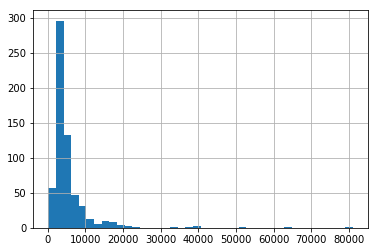

In [12]:
# Distribution analysis

# histogram of ApplicantIncome

loan["ApplicantIncome"].hist(bins = 40)   #we observe that there are few extreme values

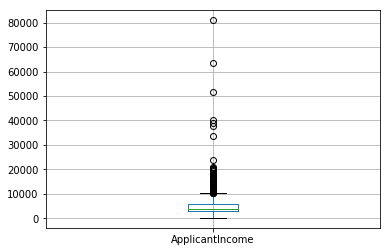

In [13]:
#Boxplot Distribution for ApplicantIncome

loan.boxplot(column = "ApplicantIncome")

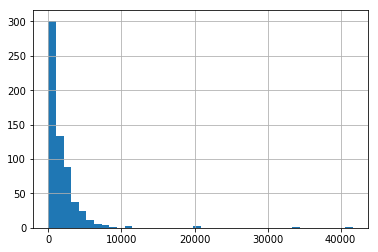

In [14]:
# histogram of CoApplicantIncome

loan["CoapplicantIncome"].hist(bins = 40)  

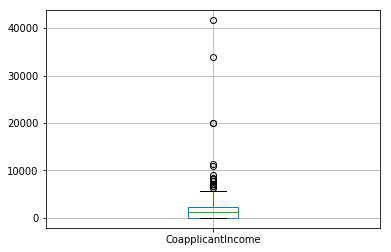

In [15]:
#Boxplot Distribution for CoapplicantIncome

loan.boxplot(column = "CoapplicantIncome")

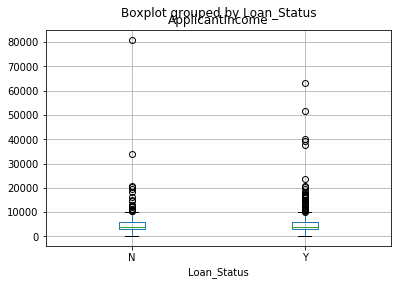

In [16]:
# Lets segregate ApplicantIncome by Loan_Status

loan.boxplot(column = "ApplicantIncome", by = "Loan_Status")

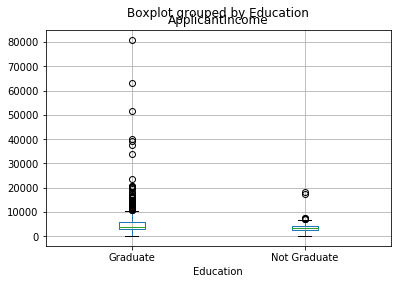

In [17]:
# ApplicantIncome by Education

loan.boxplot(column = "ApplicantIncome", by = "Education")

In [18]:
# Higher number of graduates with very high incomes, which are appearing to be the outliers

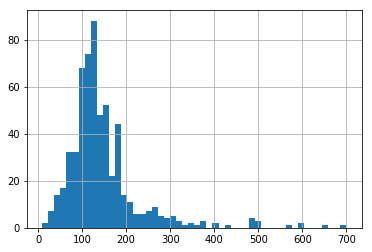

In [19]:
# Let’s look at the histogram and boxplot of LoanAmount

loan["LoanAmount"].hist(bins = 50)

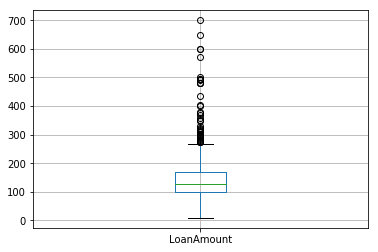

In [20]:
loan.boxplot(column = "LoanAmount")

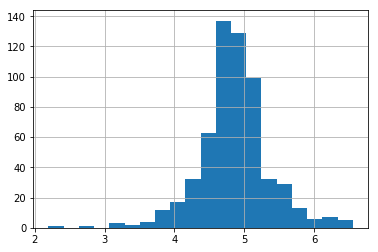

In [21]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist(bins=20)

In [22]:
temp1 =loan['Credit_History'].value_counts(ascending=True)
temp2 = loan.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [23]:
temp3 = loan['Credit_History'].value_counts(ascending=True)
temp4 = loan.pivot_table(values='Loan_Status',index=['Credit_History',"Gender"],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp3)

print ('\nProbility of getting loan for each Credit History class:')
print (temp4)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                       Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665


In [24]:
## Checking for the missing values for each columns

loan.apply(lambda x: sum(x.isnull()), axis = 0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [25]:
loan[["LoanAmount", "Education"]].groupby(["Education"]).describe()

LoanAmount                                                    \
                  count        mean        std   min    25%    50%    75%   
Education                                                                   
Graduate          465.0  154.060215  92.883366   9.0  103.0  132.0  176.0   
Not Graduate      127.0  118.409449  39.773636  25.0   96.5  115.0  133.0   

                     
                max  
Education            
Graduate      700.0  
Not Graduate  279.0

In [26]:
loan[["LoanAmount"]].describe()

,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


In [27]:
loan["LoanAmount"].mean()

146.41216216216216

In [28]:
temp5 = loan['Loan_Status'].value_counts(ascending=True)
temp6 = loan.pivot_table(values='Loan_Status',index=['Credit_History',"Self_Employed"],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Loan Status:') 
print (temp5)

print ('\nProbility of getting loan for each Credit History and self employed class:')
print (temp6)

Frequency Table for Loan Status:
N    192
Y    422
Name: Loan_Status, dtype: int64

Probility of getting loan for each Credit History and self employed class:
                              Loan_Status
Credit_History Self_Employed             
0.0            No                0.092105
               Yes               0.000000
1.0            No                0.790698
               Yes               0.793651


In [29]:
loan[["LoanAmount", "LoanAmount_log", "Self_Employed"]].groupby(["Self_Employed"]).describe()  

LoanAmount                                                      \
                   count        mean         std   min    25%    50%     75%   
Self_Employed                                                                  
No                 482.0  141.748963   79.780919   9.0  100.0  125.0  161.75   
Yes                 79.0  172.000000  108.634650  25.0  106.0  150.0  189.00   

                     LoanAmount_log                                          \
                 max          count      mean       std       min       25%   
Self_Employed                                                                 
No             700.0          482.0  4.831268  0.497604  2.197225  4.605170   
Yes            650.0           79.0  5.001154  0.531773  3.218876  4.663439   

                                             
                    50%       75%       max  
Self_Employed                                
No             4.828314  5.086048  6.551080  
Yes            5.010635  5.241733  6.476972

In [31]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [33]:
# Replacing missing values by its mode

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

In [35]:
#Adding an extra column called Income

loan["Income"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]

In [36]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Income
count,614.000000,614.000000,592.000000,614.000000,614.000000,592.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,4.857444,7024.705081
std,6109.041673,2926.248369,85.587325,64.428629,0.352339,0.505142,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,4.605170,4166.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,4.852030,5416.500000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000,5.123964,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000


In [37]:
loan.loc[:,["ApplicantIncome","CoapplicantIncome","Income"]]

,ApplicantIncome,CoapplicantIncome,Income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0
5,5417,4196.0,9613.0
6,2333,1516.0,3849.0
7,3036,2504.0,5540.0
8,4006,1526.0,5532.0
9,12841,10968.0,23809.0


In [38]:
loan.loc[loan.Income < 4000].count()

Loan_ID              143
Gender               143
Married              143
Dependents           143
Education            143
Self_Employed        143
ApplicantIncome      143
CoapplicantIncome    143
LoanAmount           138
Loan_Amount_Term     143
Credit_History       143
Property_Area        143
Loan_Status          143
LoanAmount_log       138
Income               143
dtype: int64

In [39]:
# Setting a range for Income Values

loan["Income_range"] = np.where(loan.Income < 3000,1,
                        (np.where(loan.Income < 4000,2, 
                        (np.where(loan.Income < 5000,3,
                        (np.where(loan.Income < 8000,4,
                        (np.where(loan.Income < 10000,5,
                        (np.where(loan.Income < 15000,6,7)))))))))))

In [136]:
loan.Income_range.head()

0    4
1    4
2    2
3    3
4    4
Name: Income_range, dtype: int32

In [41]:
loan[["LoanAmount", "Credit_History","Self_Employed","Education","Income_range"]].groupby(["Credit_History","Self_Employed", "Education", "Income_range"]).describe()  

LoanAmount              \
                                                            count        mean   
Credit_History Self_Employed Education    Income_range                          
0.0            No            Graduate     1                   4.0   77.500000   
                                          2                   6.0   90.000000   
                                          3                  12.0  124.500000   
                                          4                  20.0  134.400000   
                                          5                   3.0  173.333333   
                                          6                   4.0  192.000000   
                                          7                   3.0  485.000000   
                             Not Graduate 1                   2.0   62.500000   
                                          2                   2.0  113.500000   
                                          3                   8.0  111.375000   
                                          4                  10.0  151.900000   
               Yes           Graduate     1                   2.0   86.000000   
                                          3                   1.0  133.000000   
                                          4                   1.0  105.000000   
                                          6                   4.0  252.250000   
                                          7                   1.0  192.000000   
                             Not Graduate 4                   2.0  161.500000   
1.0            No            Graduate     1                  24.0   72.625000   
                                          2                  60.0   97.916667   
                                          3                  67.0  113.089552   
                                          4                 112.0  144.866071   
                                          5                  32.0  198.125000   
                                          6                  37.0  227.729730   
                                          7                  19.0  335.684211   
                             Not Graduate 1                   9.0   72.666667   
                                          2                  22.0   91.818182   
                                          3                  24.0  118.458333   
                                          4                  31.0  130.741935   
                                          5                   2.0  208.500000   
               Yes           Graduate     1                   2.0   94.000000   
                                          2                   3.0   71.000000   
                                          3                   4.0  111.250000   
                                          4                  22.0  157.818182   
                                          5                   6.0  191.666667   
                                          6                   5.0  160.000000   
                                          7                  11.0  310.909091   
                             Not Graduate 2                   2.0   79.500000   
                                          3                   4.0  132.000000   
                                          4                   7.0  132.714286   
                                          7                   2.0  175.000000   

                                                                           \
                                                               std    min   
Credit_History Self_Employed Education    Income_range                      
0.0            No            Graduate     1              19.052559   60.0   
                                          2              16.284962   71.0   
                                          3              20.930621   90.0   
                                          4              32.112303   72.0   
                                

**Missing value imputation for train data**

In [42]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 1)] = 77.5
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) &(loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 2)] = 90
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) &(loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 3)] = 124.5
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) &(loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 4)] = 134.40
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) &(loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 5)] = 173.33
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) &(loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 6)] = 192
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") 
                & (loan.Income_range == 7)] = 485

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [43]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 1)] = 62.5
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 2)] = 113.50
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 3)] = 111.375
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 4)] = 151.90

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [44]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 1)] = 86
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 3)] = 133
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 4)] = 105
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 6)] = 252.25
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 7)] = 192

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [45]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 0) & (loan.Self_Employed=="Yes") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 4)] = 161.5
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 1)] = 72.625
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 2)] = 97.92
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 3)] = 113.09
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 4)] = 144.87
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 5)] = 198.13
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 6)] = 227.73
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Graduate") &
               (loan.Income_range == 7)] = 335.68

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [46]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 1)] = 72.67
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 2)] = 91.81
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 3)] = 118.46
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 4)] = 130.74
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="No") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 5)] = 208.5

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [47]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 1)] = 94
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed== "Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 2)] = 71
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 3)] = 111.25
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 4)] = 157.82
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 5)] = 191.67
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 6)] = 160
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Graduate") &
               (loan.Income_range == 7)] = 310.91

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [48]:
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 2)] = 79.5
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 3)] = 132
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 4)] = 132.72
loan.LoanAmount[(loan.LoanAmount.isnull()) & (loan.Credit_History == 1) & (loan.Self_Employed=="Yes") & (loan.Education=="Not Graduate") &
               (loan.Income_range == 7)] = 175

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying t

In [49]:
# Checking for Missing values again

loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Income                0
Income_range          0
dtype: int64

In [50]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Income,Income_range
count,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.511906,342.410423,0.855049,4.857444,7024.705081,3.679153
std,6109.041673,2926.248369,85.547276,64.428629,0.352339,0.505142,6458.663872,1.536820
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,1.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,4.605170,4166.000000,3.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,4.852030,5416.500000,4.000000
75%,5795.000000,2297.250000,166.750000,360.000000,1.000000,5.123964,7521.750000,4.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,7.000000


In [51]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Income,Income_range
ApplicantIncome,1.000000,-0.116605,0.578832,-0.046531,-0.018615,0.439463,0.893037,0.572561
CoapplicantIncome,-0.116605,1.000000,0.183013,-0.059383,0.011134,0.207122,0.342781,0.350129
LoanAmount,0.578832,0.183013,1.000000,0.037006,0.006747,0.896371,0.630417,0.671953
Loan_Amount_Term,-0.046531,-0.059383,0.037006,1.000000,-0.004705,0.086511,-0.070917,-0.025062
Credit_History,-0.018615,0.011134,0.006747,-0.004705,1.000000,-0.019005,-0.012563,0.016403
LoanAmount_log,0.439463,0.207122,0.896371,0.086511,-0.019005,1.000000,0.508953,0.677879
Income,0.893037,0.342781,0.630417,-0.070917,-0.012563,0.508953,1.000000,0.700201
Income_range,0.572561,0.350129,0.671953,-0.025062,0.016403,0.677879,0.700201,1.000000


In [52]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Income', 'Income_range'],
      dtype='object')

In [53]:
loan.Dependents = loan.Dependents.str.strip("+").astype("int")

In [54]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null int32
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       592 non-null float64
Income               614 non-null float64
Income_range         614 non-null int32
dtypes: float64(6), int32(2), int64(1), object(7)
memory usage: 72.0+ KB


**Test data**

In [55]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [56]:
loan1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Missing value imputation for test data**

In [57]:
# Replacing missing values by its mode

loan1['Gender'].fillna(loan1['Gender'].mode()[0], inplace=True)
loan1['Married'].fillna(loan1['Married'].mode()[0], inplace=True)
loan1['Dependents'].fillna(loan1['Dependents'].mode()[0], inplace=True)
loan1['Loan_Amount_Term'].fillna(loan1['Loan_Amount_Term'].mode()[0], inplace=True)
loan1['Credit_History'].fillna(loan1['Credit_History'].mode()[0], inplace=True)
loan1['Self_Employed'].fillna(loan1['Self_Employed'].mode()[0], inplace=True)

#Adding an extra column called income

loan1["Income"] = loan1["ApplicantIncome"] + loan1["CoapplicantIncome"]

# Setting a range for Income Values

loan1["Income_range"] = np.where(loan1.Income < 3000,1,
                        (np.where(loan1.Income < 4000,2, 
                        (np.where(loan1.Income < 5000,3,
                        (np.where(loan1.Income < 8000,4,
                        (np.where(loan1.Income < 10000,5,
                        (np.where(loan1.Income < 15000,6,7)))))))))))

In [58]:
loan1[["LoanAmount", "Credit_History","Self_Employed","Education","Income_range"]].groupby(["Credit_History","Self_Employed", "Education", "Income_range"]).describe()  

LoanAmount              \
                                                            count        mean   
Credit_History Self_Employed Education    Income_range                          
0.0            No            Graduate     1                   3.0  112.333333   
                                          2                   7.0  124.714286   
                                          3                  10.0  126.200000   
                                          4                  17.0  136.000000   
                                          5                   1.0  187.000000   
                                          6                   2.0  233.000000   
                                          7                   1.0  148.000000   
                             Not Graduate 1                   1.0  170.000000   
                                          2                   2.0  133.500000   
                                          3                   7.0  126.000000   
                                          4                   5.0  142.800000   
               Yes           Graduate     4                   1.0  187.000000   
                             Not Graduate 5                   1.0  199.000000   
1.0            No            Graduate     1                   9.0   57.444444   
                                          2                  24.0   96.583333   
                                          3                  55.0  114.272727   
                                          4                  80.0  141.675000   
                                          5                  19.0  201.368421   
                                          6                  12.0  231.250000   
                                          7                  10.0  224.200000   
                             Not Graduate 1                   8.0   75.750000   
                                          2                  19.0  104.684211   
                                          3                  13.0  123.692308   
                                          4                  17.0  131.588235   
                                          5                   2.0  133.000000   
                                          6                   0.0         NaN   
                                          7                   1.0  102.000000   
               Yes           Graduate     1                   1.0  137.000000   
                                          2                   1.0   88.000000   
                                          3                   2.0  106.500000   
                                          4                  16.0  136.750000   
                                          5                   5.0  151.400000   
                                          6                   2.0  218.500000   
                                          7                   1.0  550.000000   
                             Not Graduate 1                   1.0   68.000000   
                                          2                   1.0   64.000000   
                                          3                   1.0  125.000000   
                                          4                   3.0  119.000000   
                                          5                   1.0  187.000000   

                                                                           \
                                                               std    min   
Credit_History Self_Employed Education    Income_range                      
0.0            No            Graduate     1              24.785749   84.0   
                                          2              27.813152   94.0   
                                          3              40.485388   80.0   
                                          4              40.943559   49.0   
                                          5                    NaN  187.0   
                                    

In [59]:

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 1)] = 112.33
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) &(loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 2)] = 124.714
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) &(loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 3)] = 126.20
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) &(loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 4)] = 136
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) &(loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 5)] = 187
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) &(loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 6)] = 233
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") 
                & (loan1.Income_range == 7)] = 148


loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 1)] = 170
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 2)] = 133.50
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 3)] = 126.
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 4)] = 142.8

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 4)] = 187

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 0) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 3)] = 199

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 1)] = 57.44
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 2)] = 96.58
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 3)] = 114.27
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 4)] = 141.68
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 5)] = 201.37
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 6)] = 231.25
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 7)] = 224.2

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 1)] = 75.75
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 2)] = 104.68
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 3)] = 123.69
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 4)] = 131.59
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 5)] = 133 
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 6)] = 0   ##
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="No") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 7)] = 102

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 1)] = 137
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed== "Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 2)] = 88
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 3)] = 106.5
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 4)] = 136.75
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 5)] = 151.4
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 6)] = 218.5
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Graduate") &
               (loan1.Income_range == 7)] = 550

loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 1)]= 68
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 2)]= 64
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 3)]= 125
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 4)]= 119
loan1.LoanAmount[(loan1.LoanAmount.isnull()) & (loan1.Credit_History == 1) & (loan1.Self_Employed=="Yes") & (loan1.Education=="Not Graduate") &
               (loan1.Income_range == 5)] = 187

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_laun

C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RD\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [60]:
loan1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income,Income_range
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.230272,342.822888,0.839237,6375.177112,3.558583
std,4910.685399,2334.232099,61.774714,64.658402,0.367814,5199.423594,1.353492
min,0.000000,0.000000,0.000000,6.000000,0.000000,1760.000000,1.000000
25%,2864.000000,0.000000,100.500000,360.000000,1.000000,4156.000000,3.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,5205.000000,4.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,6980.000000,4.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,72529.000000,7.000000


In [61]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
Income               367 non-null int64
Income_range         367 non-null int32
dtypes: float64(3), int32(1), int64(3), object(7)
memory usage: 38.8+ KB


In [62]:
loan1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Income               0
Income_range         0
dtype: int64

**Converting all categorical variables to dummy variables**

In [103]:
# Dummy variables for train data i.e loan 

Gender = pd.get_dummies(loan.Gender,prefix = "Gender")
Gender = Gender.iloc[:,:-1]
Married = pd.get_dummies(loan.Married,prefix = "Married")
Married = Married.iloc[:,:-1]
Dependents = pd.get_dummies(loan.Dependents,prefix = "Dependents")
Dependents = Dependents.iloc[:,:-1]
Education = pd.get_dummies(loan.Education,prefix = "Education")
Education = Education.iloc[:,:-1]
Self_Employed = pd.get_dummies(loan.Self_Employed ,prefix = "Self_Employed")
Self_Employed = Self_Employed.iloc[:,:-1]
Credit_History = pd.get_dummies(loan.Credit_History ,prefix = "Credit_History")
Credit_History= Credit_History.iloc[:,:-1]
Property_Area = pd.get_dummies(loan.Property_Area  ,prefix = "Property_Area")
Property_Area = Property_Area.iloc[:,:-1]
Loan_Status = pd.get_dummies(loan.Loan_Status  ,prefix = "Loan_Status")
Loan_Status = Loan_Status.iloc[:,:-1]


In [106]:
train = pd.concat([Gender, Married, Gender, loan.LoanAmount, Education, Self_Employed, Credit_History, Property_Area, loan.Income_range,loan.Loan_Status], axis = 1)

In [107]:
train.columns

Index(['Gender_Female', 'Married_No', 'Gender_Female', 'LoanAmount',
       'Education_Graduate', 'Self_Employed_No', 'Credit_History_0.0',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Income_range',
       'Loan_Status'],
      dtype='object')

In [91]:
# Dummy variables for test data i.e loan 1

Gender = pd.get_dummies(loan1.Gender,prefix = "Gender")
Gender = Gender.iloc[:,:-1]
Married = pd.get_dummies(loan1.Married,prefix = "Married")
Married = Married.iloc[:,:-1]
Dependents = pd.get_dummies(loan1.Dependents,prefix = "Dependents")
Dependents = Dependents.iloc[:,:-1]
Education = pd.get_dummies(loan1.Education,prefix = "Education")
Education = Education.iloc[:,:-1]
Self_Employed = pd.get_dummies(loan1.Self_Employed ,prefix = "Self_Employed")
Self_Employed = Self_Employed.iloc[:,:-1]
Credit_History = pd.get_dummies(loan1.Credit_History ,prefix = "Credit_History")
Credit_History= Credit_History.iloc[:,:-1]
Property_Area = pd.get_dummies(loan1.Property_Area  ,prefix = "Property_Area")
Property_Area = Property_Area.iloc[:,:-1]

In [101]:
test = pd.concat([Gender,Married,Gender, loan1.LoanAmount, Education,Self_Employed,Credit_History,Property_Area,loan1.Income_range], axis = 1)

In [102]:
test.columns

Index(['Gender_Female', 'Married_No', 'Gender_Female', 'LoanAmount',
       'Education_Graduate', 'Self_Employed_No', 'Credit_History_0.0',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Income_range'],
      dtype='object')

In [93]:
type(test)

pandas.core.frame.DataFrame

##### Decision tree

In [63]:
# test data = loan1
# train data =  loan

In [108]:
## Train data

model = DecisionTreeClassifier()
loan_x= train[['Gender_Female', 'LoanAmount', 'Education_Graduate', 'Self_Employed_No', 'Married_No','Credit_History_0.0']]  ## X - train
loan_y = train[['Loan_Status']]  ## Y - train

In [109]:
loan_x.shape

(614, 7)

In [110]:
loan_x.isnull().sum()

Gender_Female         0
Gender_Female         0
LoanAmount            0
Education_Graduate    0
Self_Employed_No      0
Married_No            0
Credit_History_0.0    0
dtype: int64

In [111]:
loan_y.Loan_Status.value_counts()/len(loan_y)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [117]:
## Test data

loan1_x = test[['Gender_Female', 'LoanAmount', 'Education_Graduate', 'Self_Employed_No', 'Married_No','Credit_History_0.0']]  ##test_x

In [113]:
loan1_x.isnull().sum()

Gender            0
LoanAmount        0
Education         0
Self_Employed     0
Married           0
Credit_History    0
dtype: int64

**Decision tree classifier with criterion gini index**

In [114]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score #Import scikit-learn metrics module for accuracy calculation

In [123]:
## Fitting the Decision regression tree to the dataset
clf_gini = DecisionTreeClassifier(criterion="gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(loan_x, loan_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

**Classifying new Observations**

In [118]:
#Making Prediction
y_pred = clf_gini.predict(loan1_x)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y